In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from empiricaldist import Pmf
from empiricaldist import Cdf

In [2]:
df = pd.read_csv('data_music_trends.csv', sep=",", encoding='cp1252')


In [3]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
df.drop(['Unnamed: 0'], axis= 1, inplace= True)
df.drop(['live'], axis= 1, inplace= True)
df.columns = ['Title', 'Artist', 'Genre', 'Year', 'BPM', 'Energy', 'Danceability', 'dB', 'Valence', 'Duration', 'Acousticness', 'Speechness', 'Popularity']

In [5]:
df.head()

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Valence,Duration,Acousticness,Speechness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,43,221,2,4,78


# 3.1

In [6]:
df.head()

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Valence,Duration,Acousticness,Speechness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,43,221,2,4,78


# 3.2

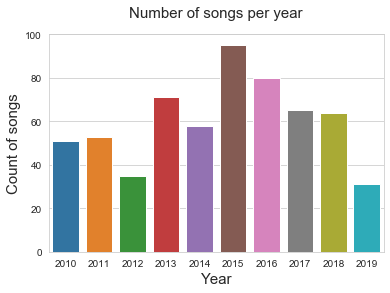

In [7]:
sns.set_style("whitegrid") 

g= sns.countplot(x= 'Year', data= df)
g.set_xlabel("Year", size= 15)
g.set_ylabel("Count of songs", size= 15)
g.set_title('Number of songs per year', size= 15, y= 1.05)
g.set_ylim(0,100)

plt.show()

# 3.3

In [8]:
df.shape

(603, 13)

# 3.4

In [9]:
df.isnull().sum() 

Title           0
Artist          0
Genre           0
Year            0
BPM             0
Energy          0
Danceability    0
dB              0
Valence         0
Duration        0
Acousticness    0
Speechness      0
Popularity      0
dtype: int64

# 3.5 Dispersion

In [ ]:
df.columns

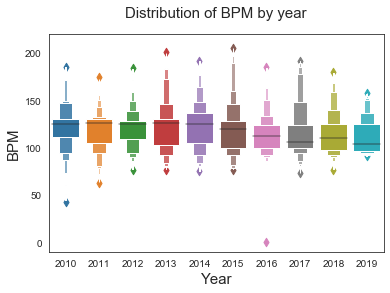

In [11]:
sns.set_style("white") 
g= sns.boxenplot(data=df, x='Year', y='BPM')

g.set_title("Distribution of BPM by year", size= 15, y= 1.05) 
g.set_xlabel('Year', size= 15)
g.set_ylabel('BPM', size= 15)
g.set_ylim(-10,220) 

plt.show() 

# 3.6

In [12]:
df[df["BPM"] == 0]

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Valence,Duration,Acousticness,Speechness,Popularity
442,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,227,0,0,0


# 3.7

In [14]:
df.drop(442, inplace= True)

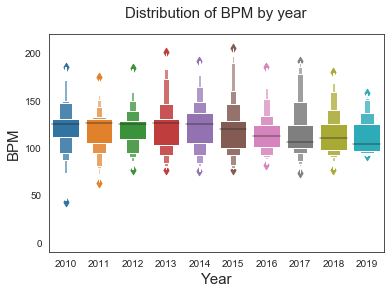

In [16]:
sns.set_style("white") 
g= sns.boxenplot(data=df, x='Year', y='BPM')

g.set_title("Distribution of BPM by year", size= 15, y= 1.05) 
g.set_xlabel('Year', size= 15)
g.set_ylabel('BPM', size= 15)
g.set_ylim(-10,220) 

plt.show() 

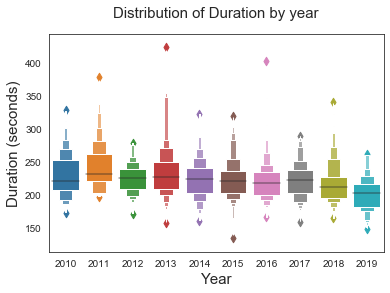

In [19]:
sns.set_style("white") 
g= sns.boxenplot(data=df, x='Year', y='Duration')

g.set_title("Distribution of Duration by year", size= 15, y= 1.05) 
g.set_xlabel('Year', size= 15)
g.set_ylabel('Duration (seconds)', size= 15)
plt.show() 

# 3.8

In [20]:
df[df['Duration']<140]

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Valence,Duration,Acousticness,Speechness,Popularity
330,Mark My Words,Justin Bieber,canadian pop,2015,114,26,38,-9,52,134,88,3,63


# 3.9

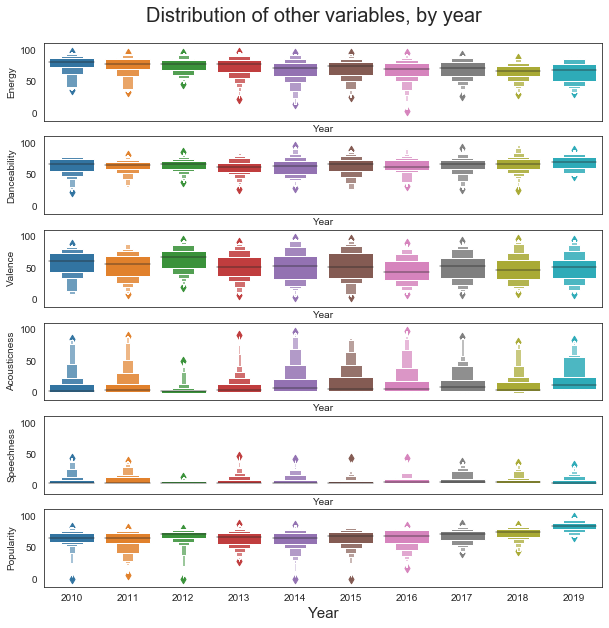

In [23]:
sns.set_style("white")

fig, (ax0, ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=6,
                                                  ncols=1, 
                                                  sharex= True, 
                                                  sharey=True, 
                                                  figsize=(10,10))

sns.boxenplot(data=df, x='Year', y='Energy', ax= ax0)
sns.boxenplot(data=df, x='Year', y='Danceability', ax= ax1)
sns.boxenplot(data=df, x='Year', y='Valence', ax= ax2)
sns.boxenplot(data=df, x='Year', y='Acousticness', ax= ax3)
sns.boxenplot(data=df, x='Year', y='Speechness', ax= ax4)
sns.boxenplot(data=df, x='Year', y='Popularity', ax= ax5)


fig.suptitle("Distribution of other variables, by year", size= 20, y= 0.93)  
ax5.set_xlabel('Year', size= 15) 
plt.show() 

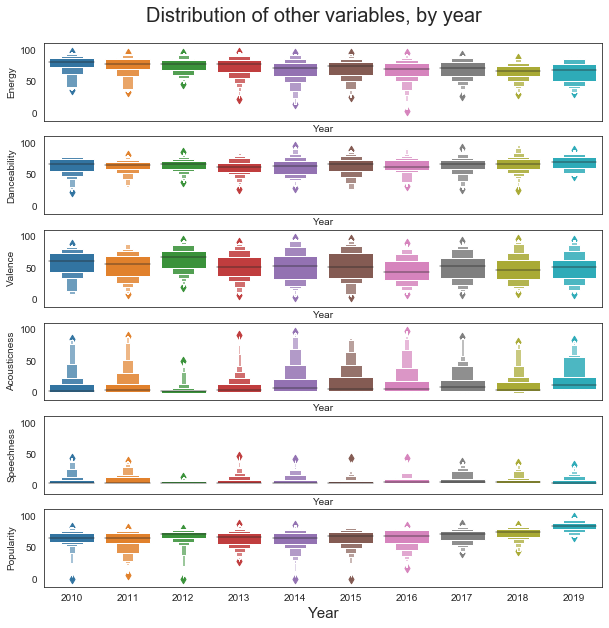

In [26]:
sns.set_style("white")

fig, (ax0, ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=6, ncols=1, sharex= True, sharey=True, figsize=(10,10))

ax_dict= {'a': ax0, 'b': ax1, 'c': ax2, 'd': ax3, 'e':ax4, 'f': ax5}
ax_list= ['a', 'b', 'c', 'd', 'e', 'f']
variables= ['Energy', 'Danceability', 'Valence', 'Acousticness', 'Speechness', 'Popularity']

for v, a in zip(variables, ax_list):
    sns.boxenplot(data=df, x='Year', y=v, ax= ax_dict[a])

fig.suptitle("Distribution of other variables, by year", size= 20, y= 0.93)  
ax5.set_xlabel('Year', size= 15) 

plt.show() 

# 3.10

In [27]:
df[df['Title'] == 'FourFiveSeconds']

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Valence,Duration,Acousticness,Speechness,Popularity
276,FourFiveSeconds,Rihanna,barbadian pop,2015,206,27,58,-6,35,188,88,5,80


# 4.1

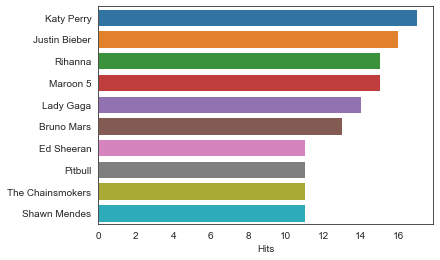

In [28]:
hits = df.Artist.value_counts().sort_values(ascending = False)
hits = pd.DataFrame(hits)
hits.columns= ['Hits']
top_artists= hits[hits['Hits'] > 10]

sns.barplot(data=top_artists, x='Hits', y= top_artists.index) 

plt.show() 

# 4.2

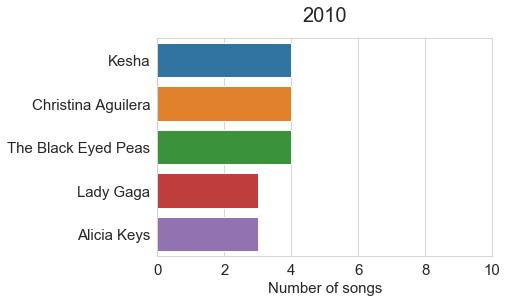

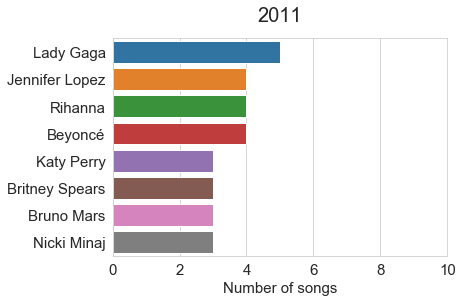

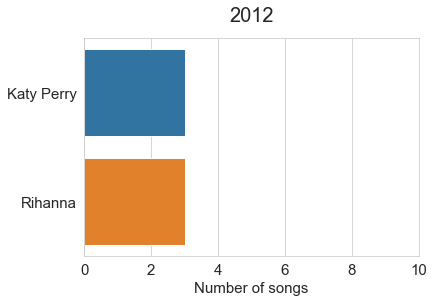

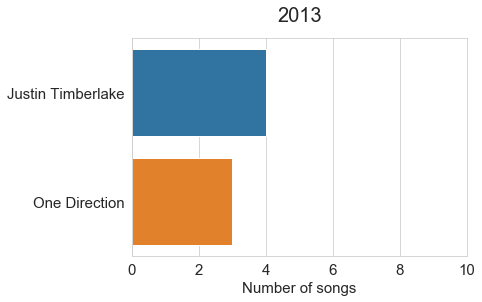

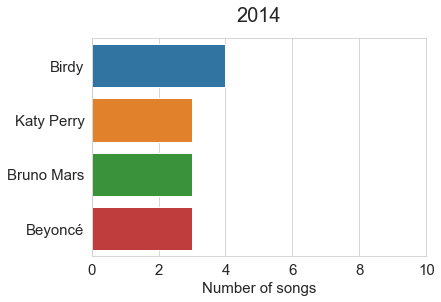

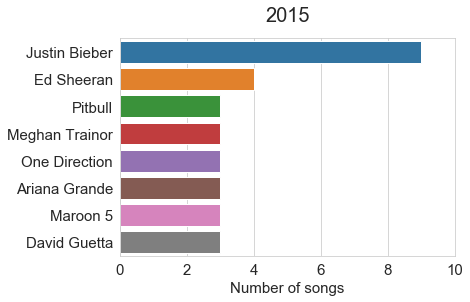

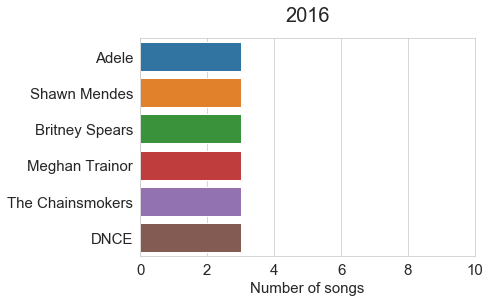

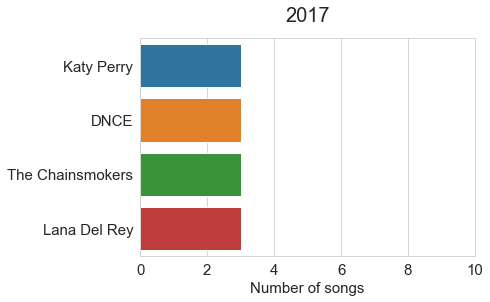

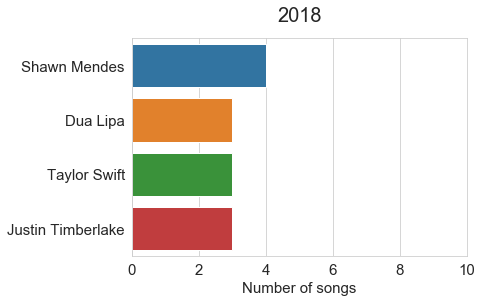

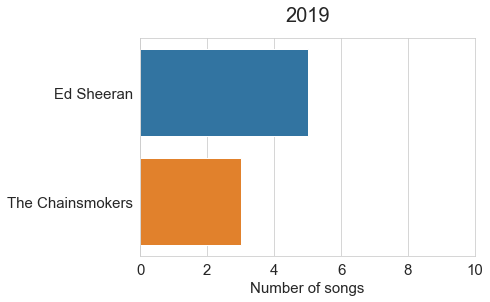

In [43]:
years = list(df['Year'].unique())

for year in years:
    
    data = df[df['Year'] == year]
    hits = data.Artist.value_counts().sort_values(ascending = False)
    hits = pd.DataFrame(hits)
    hits.columns= ['Hits']
    top_artists= hits[hits['Hits'] > 2]
    
    sns.set_style("whitegrid") 
    
    fig, ax = plt.subplots()
    sns.barplot(data=top_artists, x='Hits', y= top_artists.index) 
    ax.set_xlabel('Number of songs', size= 15)
    ax.set_xlim(0,10)
    ax.set_title(year, y= 1.05, size= 20)
    
    plt.yticks(size= 15)
    plt.xticks(size= 15)

    plt.show()

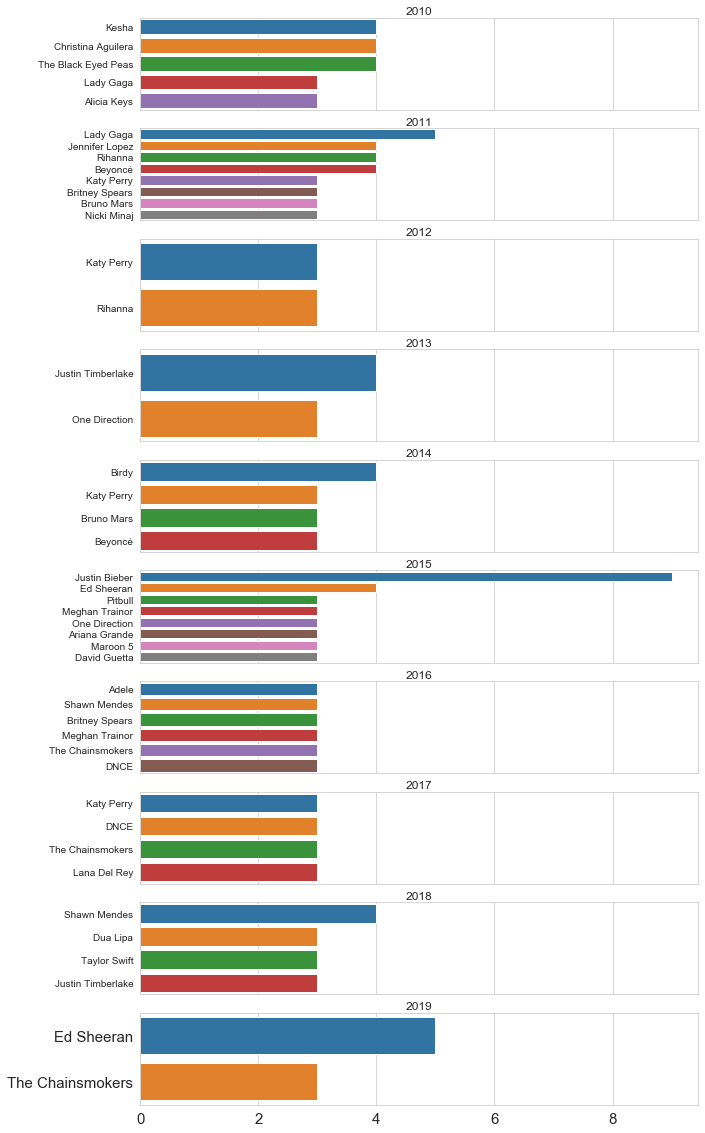

In [40]:
sns.set_style("whitegrid")
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, 
      ax9) = plt.subplots(nrows=10, ncols=1, sharex= True, figsize= (10,20))

years = range(2010,2020)
ax_dict= {'a': ax0, 'b': ax1, 'c': ax2, 'd': ax3, 'e':ax4, 
           'f': ax5, 'g': ax6, 'h': ax7, 'i': ax8, 'j': ax9}
ax_list= ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i', 'j']
   
for year, a in zip(years, ax_list):

    data= df[df['Year'] == year]['Artist']
    hits = data.value_counts().sort_values(ascending = False)
    hits = pd.DataFrame(hits)
    hits.columns= ['Hits']
    top_artists= hits[hits['Hits'] > 2]

    sns.barplot(data=top_artists, x='Hits', y= top_artists.index, ax= ax_dict[a]) 
    ax_dict[a].set_xlabel("")
    plt.xticks(size=15)
    plt.yticks(size=15)
    ax_dict[a].set_title(year, y= 0.97)
    

plt.show()

# 4.3 Songs per artist

In [ ]:
# Calculate the average number of songs per artist for each year

years = list(df['Year'].unique())
artist_counts= []
song_counts= []

for year in years:
    
    data = df[df['Year'] == year]
    unique_artists = data["Artist"].unique()
    artist_count = len(unique_artists)
    artist_counts.append(artist_count)
    unique_songs= data["Title"].unique()
    song_count= len(unique_songs)
    song_counts.append(song_count)
    
songs_per_artist = np.array(song_counts) / np.array(artist_counts)
dic= {"Year": years, "Songs per artist": list(songs_per_artist)}
songs_per_artist_df = pd.DataFrame(dic)


#Plot a timeline of the info

sns.set_style("whitegrid")
custom_palette= ["#21B36A"]
sns.set_palette(custom_palette)

fig, ax= plt.subplots(figsize= (10,10))
 
sns.lineplot(x= 'Year', y= 'Songs per artist', data= songs_per_artist_df, ax= ax)
ax.set_xlabel('Year', size= 15)
ax.set_ylabel('Average songs per artist', size= 15)
ax.set_ylim((1.2,2))

plt.xticks(range(2010,2020), size= 15)
plt.yticks(size= 15)

fig.suptitle("Songs Per Artist", size= 20, y= 0.93) 

plt.show() 

# 4.4 Share of popularity

In [ ]:
#Calculate each artist's share of popularity for each year

years = list(df['Year'].unique())
share_of_pop= {}
for year in years:
    
    data = df[df['Year'] == year]
    yearly_share = data["Artist"].value_counts(normalize= True)
    share_of_pop[year]= yearly_share
    
# Calculate the sum of popularity of the top 5 artists for each year
    
top_5 = []
for year in years:
    sum_top = share_of_pop[year][:5].sum()
    top_5.append(sum_top)
    
top_5_dict = {'Year':years, "Top 5": top_5} 
top_5_df = pd.DataFrame(top_5_dict)


# Plot the info

sns.set_style("whitegrid")
custom_palette= ["#21B36A"]
sns.set_palette(custom_palette)
fig, ax= plt.subplots(figsize= (10,10))

sns.lineplot(x= 'Year', y= 'Top 5', data= top_5_df, ax= ax)
ax.set_xlabel('Year', size= 15)
ax.set_ylabel('Share of pop (%)', size= 15)
ax.set_ylim((0,0.5))

plt.xticks(range(2010,2020), size= 15)
plt.yticks(size= 15)
fig.suptitle("Share of popularity - Top 5 artists per year", size= 20, y= 0.93) 


# 4.5 Median artist lifespan

In [ ]:
# Median number of appearances (in years) in Billboard's list for all artists

yearly_app = df.groupby('Artist')["Year"].unique()
pop_lifespan= []
index= yearly_app.index

for i in index:
    number= len(yearly_app[i])
    pop_lifespan.append(number)
    
pop_lifespan_array = np.array(pop_lifespan)
lifespan_all= np.median(pop_lifespan_array)
lifespan_all

In [ ]:
# Categorize into top, medium and small artists

hits = df.Artist.value_counts().sort_values(ascending = False)
hits = pd.DataFrame(hits)
hits.columns= ['Hits']

cats= {}
cats['top']= hits[hits['Hits'] > 10].index
cats['medium']= hits[(hits['Hits'] < 11) & (hits['Hits'] > 2)].index
cats['small'] = hits[hits['Hits'] < 3].index



In [ ]:
# Calculate median lifespan for each category of artists

cats_iter= ["top", "medium", "small"]
medians= {}

for i in cats:
    filters = yearly_app.index.isin(cats[i])
    app= yearly_app[filters]
    lifespan = []

    for x in app.index:
        number= len(yearly_app[x])
        lifespan.append(number)

    array = np.array(lifespan)
    indic= np.median(array)
    medians[i]= indic
    
print(medians)

In [ ]:
categories= ["all", "top", "medium", "small"]
lifespan= [lifespan_all, medians["top"], medians["medium"], medians["small"]]

g= sns.barplot(x= categories, y= lifespan)
g.set_title("Median artist lifespan (in years)", size= 20, y= 1.05)

plt.xticks(size= 15)
plt.yticks(size= 15)

plt.show()

# Evolution of characteristics

In [ ]:
sns.set_style("whitegrid")
custom_palette= ["#6F8CB2"]
sns.set_palette(custom_palette)


fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(nrows=10,ncols=1, sharex= True, sharey=True, figsize=(10,10))

sns.distplot(df.query('Year == "2010"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax0)
sns.distplot(df.query('Year == "2011"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax1)
sns.distplot(df.query('Year == "2012"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax2)
sns.distplot(df.query('Year == "2013"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax3)
sns.distplot(df.query('Year == "2014"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax4)
sns.distplot(df.query('Year == "2015"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax5)
sns.distplot(df.query('Year == "2016"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax6)
sns.distplot(df.query('Year == "2017"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax7)
sns.distplot(df.query('Year == "2018"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax8)
sns.distplot(df.query('Year == "2019"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax9)


ax0.set(xlabel= "")
ax0.axvline(x= df.query('Year == "2010"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax1.set(xlabel= "")
ax1.axvline(x= df.query('Year == "2011"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax2.set(xlabel= "")
ax2.axvline(x= df.query('Year == "2012"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax3.set(xlabel= "")
ax3.axvline(x= df.query('Year == "2013"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax4.set(xlabel= "")
ax4.axvline(x= df.query('Year == "2014"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax5.set(xlabel= "")
ax5.axvline(x= df.query('Year == "2015"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax6.set(xlabel= "")
ax6.axvline(x= df.query('Year == "2016"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax7.set(xlabel= "")
ax7.axvline(x= df.query('Year == "2017"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax8.set(xlabel= "")
ax8.axvline(x= df.query('Year == "2018"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax9.set_xlim(0, 200)
ax9.set_xlabel("BPM", size= 15)
ax9.axvline(x= df.query('Year == "2019"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)



In [ ]:
variables= ['BPM', 'Energy', 'Valence', 'Danceability']

for i in variables:
    
    sns.set_style("whitegrid")
    custom_palette= ["#6F8CB2"]
    sns.set_palette(custom_palette)


    fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(nrows=10,ncols=1, sharex= True, sharey=True, figsize=(10,10))

    sns.distplot(df.query('Year == "2010"')[i], hist=False, kde_kws={'shade':True}, ax=ax0)
    sns.distplot(df.query('Year == "2011"')[i], hist=False, kde_kws={'shade':True}, ax=ax1)
    sns.distplot(df.query('Year == "2012"')[i], hist=False, kde_kws={'shade':True}, ax=ax2)
    sns.distplot(df.query('Year == "2013"')[i], hist=False, kde_kws={'shade':True}, ax=ax3)
    sns.distplot(df.query('Year == "2014"')[i], hist=False, kde_kws={'shade':True}, ax=ax4)
    sns.distplot(df.query('Year == "2015"')[i], hist=False, kde_kws={'shade':True}, ax=ax5)
    sns.distplot(df.query('Year == "2016"')[i], hist=False, kde_kws={'shade':True}, ax=ax6)
    sns.distplot(df.query('Year == "2017"')[i], hist=False, kde_kws={'shade':True}, ax=ax7)
    sns.distplot(df.query('Year == "2018"')[i], hist=False, kde_kws={'shade':True}, ax=ax8)
    sns.distplot(df.query('Year == "2019"')[i], hist=False, kde_kws={'shade':True}, ax=ax9)


    ax0.set(xlabel= "")
    ax0.axvline(x= df.query('Year == "2010"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax1.set(xlabel= "")
    ax1.axvline(x= df.query('Year == "2011"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax2.set(xlabel= "")
    ax2.axvline(x= df.query('Year == "2012"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax3.set(xlabel= "")
    ax3.axvline(x= df.query('Year == "2013"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax4.set(xlabel= "")
    ax4.axvline(x= df.query('Year == "2014"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax5.set(xlabel= "")
    ax5.axvline(x= df.query('Year == "2015"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax6.set(xlabel= "")
    ax6.axvline(x= df.query('Year == "2016"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax7.set(xlabel= "")
    ax7.axvline(x= df.query('Year == "2017"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax8.set(xlabel= "")
    ax8.axvline(x= df.query('Year == "2018"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax9.set_xlim(0, 200)
    ax9.axvline(x= df.query('Year == "2019"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)
    
    fig.suptitle(i, size= 20, y= 0.93)


# 4.8

In [ ]:
plt.clf()
variables= ['BPM', 'Energy', 'Valence', 'Danceability']

sns.set_style("whitegrid")
custom_palette= ["#6F8CB2"]
sns.set_palette(custom_palette)

for i in variables:
    
    fig, (ax0, ax1, ax2, ax3, ax4, ax5,
          ax6, ax7, ax8, ax9) = plt.subplots(nrows=10, ncols=1,
                                             sharex= True, sharey=True, 
                                             figsize=(10,10))
    
    years = range(2010,2020)
    ax_dict= {'a': ax0, 'b': ax1, 'c': ax2, 'd': ax3, 'e':ax4, 
           'f': ax5, 'g': ax6, 'h': ax7, 'i': ax8, 'j': ax9}
    ax_list= ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i', 'j']
   
    for year, a in zip(years, ax_list):
        
        sns.distplot(df[df['Year'] == year][i], hist=False, 
                     kde_kws={'shade':True}, ax= ax_dict[a])
            
        ax_dict[a].set_xlabel("") 
        ax_dict[a].set_xlim(0,200)
        ax_dict[a].set_ylim(0,0.043)

        ax_dict[a].axvline(x= df[df['Year'] == year][i].median(), 
        color='#FF6100', label='Median', linestyle='--', linewidth=2)
    
    fig.suptitle(i, size= 20, y= 0.93)
    plt.show()

In [ ]:
# Make a dictionary of the median of each attribute, for each year

variables= ['BPM', 'Energy', 'Valence', 'Danceability']
years = list(df['Year'].unique())
medians= {}

for v in variables: 
    values_list= []
    for y in years:
        median= df[df["Year"]==y][v].median()
        values_list.append(median)
    medians[v]= values_list
    
medians["Year"]= years
medians

In [ ]:
# Plot the median attributes for each year

fig, ax= plt.subplots(sharex=True, sharey= True, figsize= (10,10))

sns.lineplot(x= medians["Year"], y= medians["BPM"], color= "r", label= "BPM")
sns.lineplot(x= medians["Year"], y= medians["Energy"], color= "b", label= "Energy")
sns.lineplot(x= medians["Year"], y= medians["Valence"], color= "y", label= "Valence")
sns.lineplot(x= medians["Year"], y= medians["Danceability"], color= "g", label= "Danceability")

fig.suptitle("Median musical attributes", size= 20, y= 0.92)

legend= True
plt.xticks(medians["Year"], size= 15, rotation= 45)
plt.yticks(size= 15)
plt.show()
